In [3]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_ancestors = pd.read_csv("random_ancestors_1000_effective_dispersal.csv")

std_arg = np.sqrt(random_ancestors["arg_variance_in_estimated_location_0"])
std_0 = np.sqrt(random_ancestors["window_0_variance_in_estimated_location_0"])
std_100 = np.sqrt(random_ancestors["window_100_variance_in_estimated_location_0"])

expected_zs = []
expected_percent_within = []
percent_within_arg = []
percent_within_w0 = []
percent_within_w100 = []
for i in range(0,300):
    value = st.norm.cdf(i/100)
    expected_zs.append(i/100)
    expected_percent_within.append(value - (1-value))
    percent_within_arg.append(sum(random_ancestors["arg_abs_error_0"] <= std_arg*(i/100))/len(random_ancestors))
    percent_within_w0.append(sum(random_ancestors["window_0_abs_error_0"] <= std_0*(i/100))/len(random_ancestors))
    percent_within_w100.append(sum(random_ancestors["window_100_abs_error_0"] <= std_100*(i/100))/len(random_ancestors))


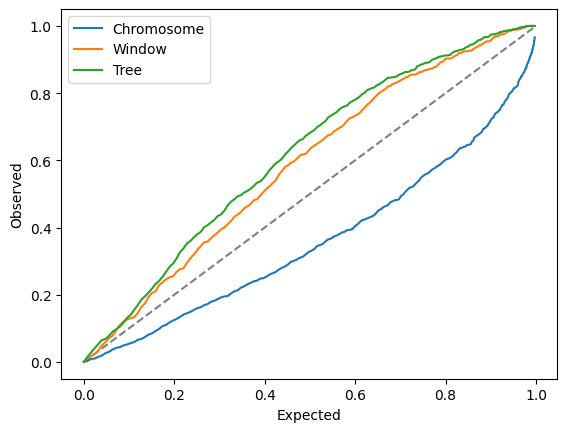

In [9]:
plt.plot(expected_percent_within, expected_percent_within, color="gray", linestyle='dashed')
plt.plot(expected_percent_within, percent_within_arg, label="Chromosome")
plt.plot(expected_percent_within, percent_within_w100, label="Window")
plt.plot(expected_percent_within, percent_within_w0, label="Tree")
plt.xlabel("Expected")
plt.ylabel("Observed")
plt.legend()
plt.savefig("Coverage.png")
plt.show()